# Rain in Australia

Kaggle dataset:

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

Based on:

https://jovian.com/aakashns/sklearn-decision-trees-random-forests


In [12]:
import os
from pathlib import Path
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

DATASET_FILE = Path("../data/weatherAUS.csv")

api.dataset_download_files("jsphyg/weather-dataset-rattle-package", path="../data", unzip=True)

In [14]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
sns.set_palette("Set2")

In [15]:
df = pd.read_csv(DATASET_FILE, parse_dates=["Date"])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [5]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df = df.dropna(subset=["RainTomorrow"])

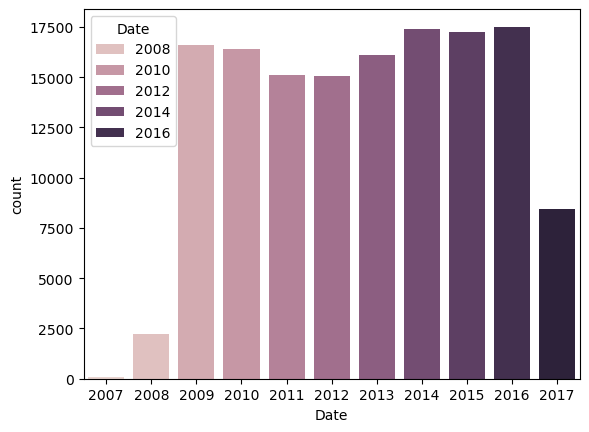

In [8]:
sns.countplot(x=df.Date.dt.year, hue=df.Date.dt.year)
plt.show()

In [9]:
numeric_cols = df.select_dtypes(include="number").columns
categorical_cols = df.select_dtypes(include="object").columns

numeric_cols, categorical_cols

(Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
        'Temp9am', 'Temp3pm'],
       dtype='object'),
 Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
        'RainTomorrow'],
       dtype='object'))

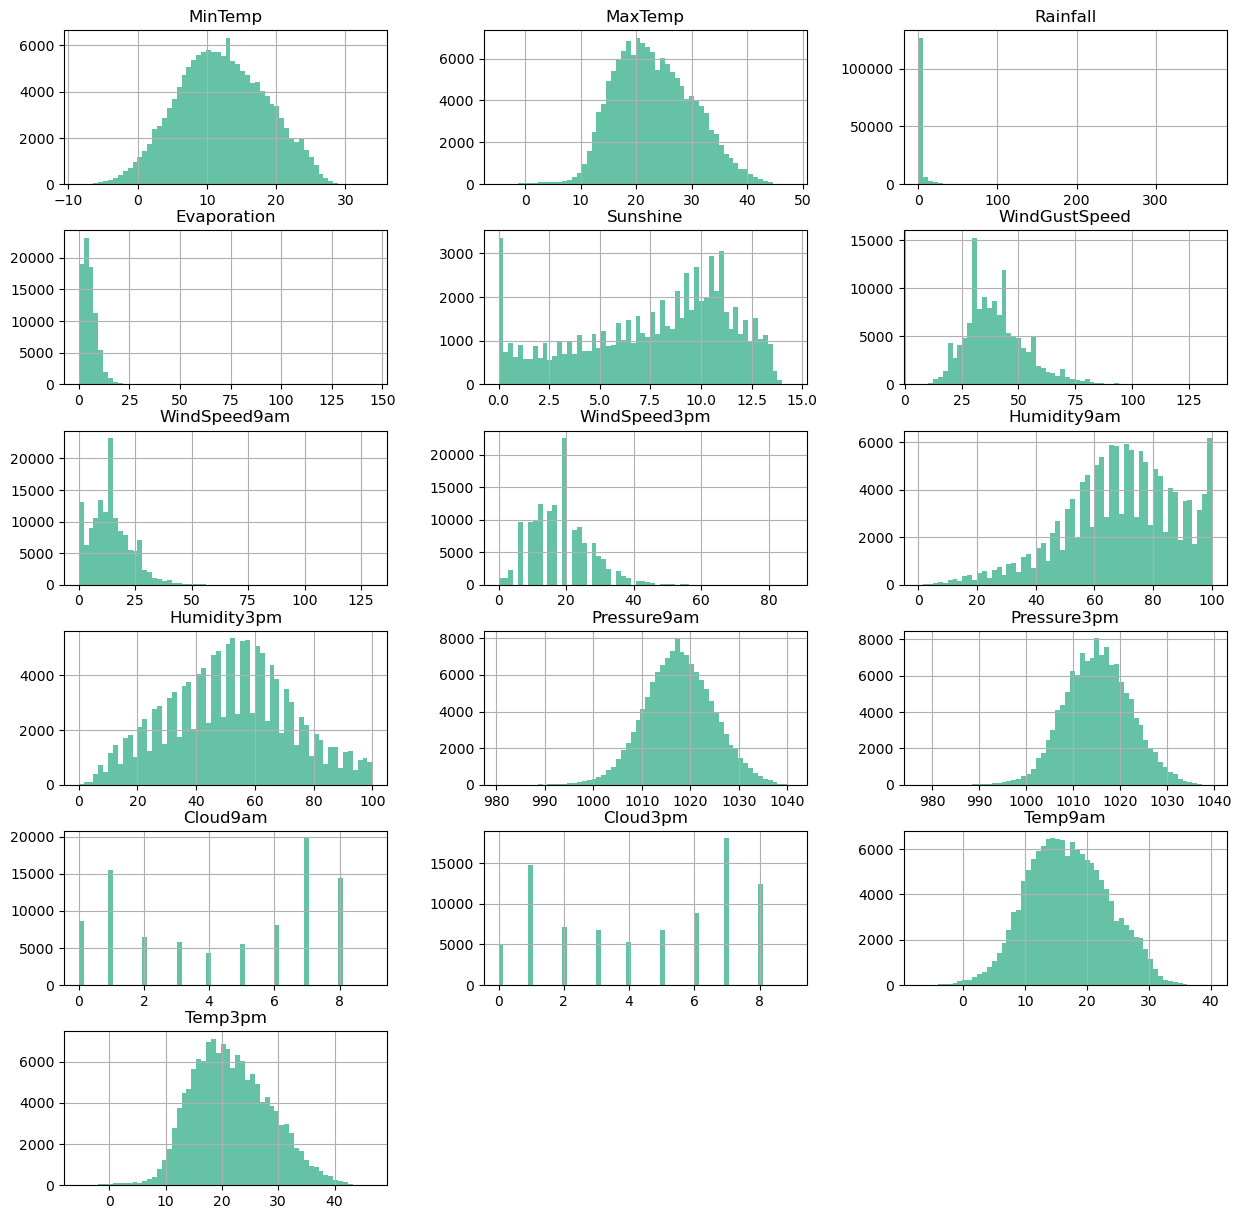

In [10]:
df.hist(column=numeric_cols, layout=(6, 3), sharex=False, bins=60, figsize=(15, 15))
plt.show()

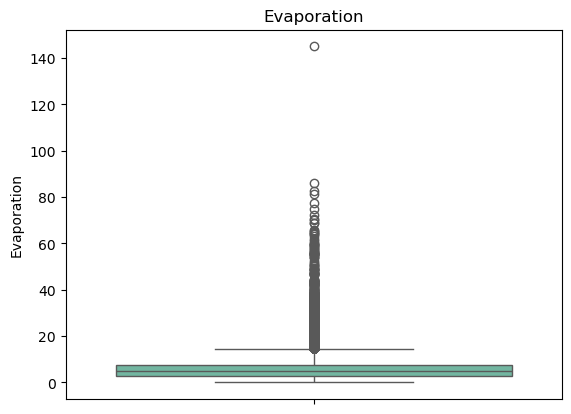

In [11]:
sns.boxplot(data=df, y="Evaporation")
plt.title("Evaporation")
# plt.yscale("log")
plt.show()

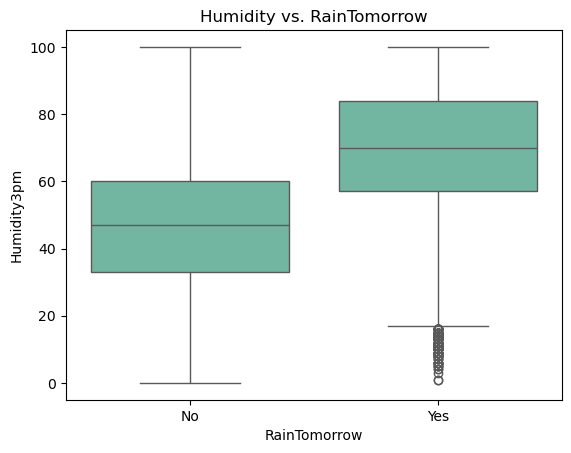

In [12]:
sns.boxplot(data=df, x="RainTomorrow", y="Humidity3pm")
plt.title("Humidity vs. RainTomorrow")
plt.show()

In [13]:
df["RainTomorrow"] = df.RainTomorrow.map({"No": 0, "Yes": 1})

In [14]:
corr_df = df[numeric_cols.to_list() + ["RainTomorrow"]].corr()["RainTomorrow"].drop("RainTomorrow").sort_values(ascending=False)
corr_df

Humidity3pm      0.446160
Cloud3pm         0.381870
Cloud9am         0.317380
Humidity9am      0.257161
Rainfall         0.239032
WindGustSpeed    0.234010
WindSpeed9am     0.090995
WindSpeed3pm     0.087817
MinTemp          0.083936
Temp9am         -0.025691
Evaporation     -0.119285
MaxTemp         -0.159237
Temp3pm         -0.192424
Pressure3pm     -0.226031
Pressure9am     -0.246371
Sunshine        -0.450768
Name: RainTomorrow, dtype: float64

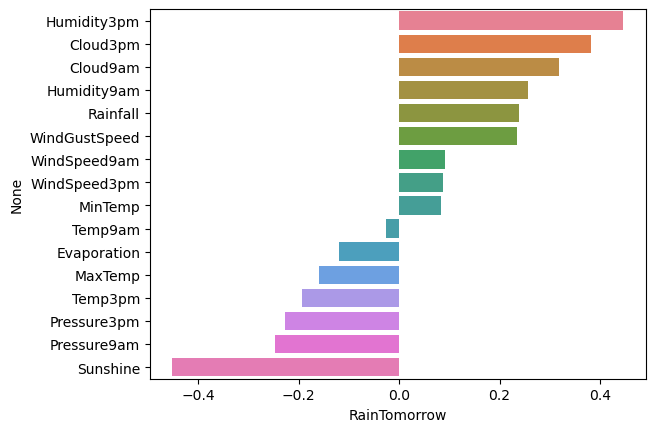

In [15]:
sns.barplot(x=corr_df, y=corr_df.index, hue=corr_df.index)
plt.show()

## Splitting into train, val, test

In [16]:
train_df = df[df.Date.dt.year <= 2015]
test_df = df[df.Date.dt.year > 2015]

In [17]:
X_train = train_df[train_df.columns[:-1]].copy()
y_train = train_df[train_df.columns[-1]].copy()

X_test = test_df[test_df.columns[:-1]].copy()
y_test = test_df[test_df.columns[-1]].copy()

X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


## Sklearn Pipeline

### Custom Transformers

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin


class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, date_fields=["year", "month", "day", "weekday", "quarter"]):
        self.date_fields = date_fields

    def fit(self, X, y=None):
        self.feature_names_out = []
        for date_column in X.columns:
            self.feature_names_out.extend(
                [f"{date_column}_{date_field}" for date_field in self.date_fields]
            )

        return self

    def get_feature_names_out(self):
        return self.feature_names_out

    def transform(self, X):
        for date_column in X.columns:
            # Ensure the column exists in the DataFrame
            if date_column not in X.columns:
                raise ValueError(f"{date_column} not found in the DataFrame.")

            # Convert the specified column to datetime
            X[date_column] = pd.to_datetime(X[date_column])

            # Extract date components
            for date_field in self.date_fields:
                X[f"{date_column}_{date_field}"] = getattr(X[date_column].dt, date_field)

            # Drop the original date column
            X = X.drop(columns=[date_column])

        return X
    
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, z_threshold=3):
        self.z_threshold = z_threshold

    def fit(self, X, y=None):
        self.feature_names_out = []
        for column_name in X.columns:
            self.feature_names_out.append(column_name)

        return self
    
    def get_feature_names_out(self):
        return self.feature_names_out

    def transform(self, X):
        for column_name in X.columns:
            mean = X[column_name].mean()
            std = X[column_name].std()
            z_scores = np.abs((X[column_name] - mean) / std)
            max_value = X[z_scores < self.z_threshold][column_name].max()
            X.loc[X[column_name] > max_value, column_name] = max_value        
        
        return X

### Preprocessing

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, QuantileTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

# Identify numeric and categorical columns
numeric_features = make_column_selector(dtype_include="number")
categorical_features = make_column_selector(dtype_include="object")

# Create transformers
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        # ("imputer", KNNImputer(n_neighbors=5)),
        # ("scaler", QuantileTransformer(output_distribution="normal")),
        # ("scaler", PowerTransformer()),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        # ("imputer", SimpleImputer(strategy="most_frequent")),
        # ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)),
    ]
)

# Create a column transformer with passthrough
data_preprocessor = ColumnTransformer(
    transformers=[
        ("outlier", OutlierRemover(z_threshold=3), ["Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]),
        ("date", DateTransformer(["year", "month", "day", "weekday", "quarter"]), ["Date"])
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Create a column transformer with passthrough
main_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Create a pipeline
preproc_pipeline = Pipeline(steps=[
    ("date_preprocessor", data_preprocessor),
    ("preprocessor", main_preprocessor)
])

# Fit and transform your data
X_train_preproc = preproc_pipeline.fit_transform(X_train)
X_test_preproc = preproc_pipeline.transform(X_test)

In [20]:
X_train_preproc.head()

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Date_year,Date_month,Date_day,Date_weekday,Date_quarter,MinTemp,MaxTemp,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_Yes,RainToday_nan
0,-0.261838,3.238267e-16,0.309105,0.693091,0.616228,-1.894505,1.577595,-1.673434,-1.491943,1.316977,0.214939,-0.025129,0.0,0.127364,-1.422391,-1.489252,-1.235148,1.598846e+00,-4.158716e-16,0.004846,0.032108,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.379173,3.238267e-16,0.309105,-1.153139,0.384730,-1.894505,1.577595,-1.559931,-0.992858,1.316977,-0.728059,0.286554,0.0,-1.293125,-1.277007,-1.059527,-1.130454,-3.873598e-16,-4.158716e-16,0.051421,0.396277,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.379173,3.238267e-16,0.465156,0.577701,0.847726,-1.894505,1.577595,-1.446428,-0.493773,1.316977,0.136356,0.371558,0.0,-1.608789,-1.034699,-1.504070,-0.995848,-3.873598e-16,-1.136702e+00,0.641373,0.236043,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.379173,3.238267e-16,-1.251405,-0.345414,-1.120005,-1.894505,1.577595,-1.332925,0.005312,1.316977,-0.445160,0.697408,0.0,-1.240514,-1.713160,-0.022259,-0.382640,-3.873598e-16,-4.158716e-16,0.191147,0.716746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

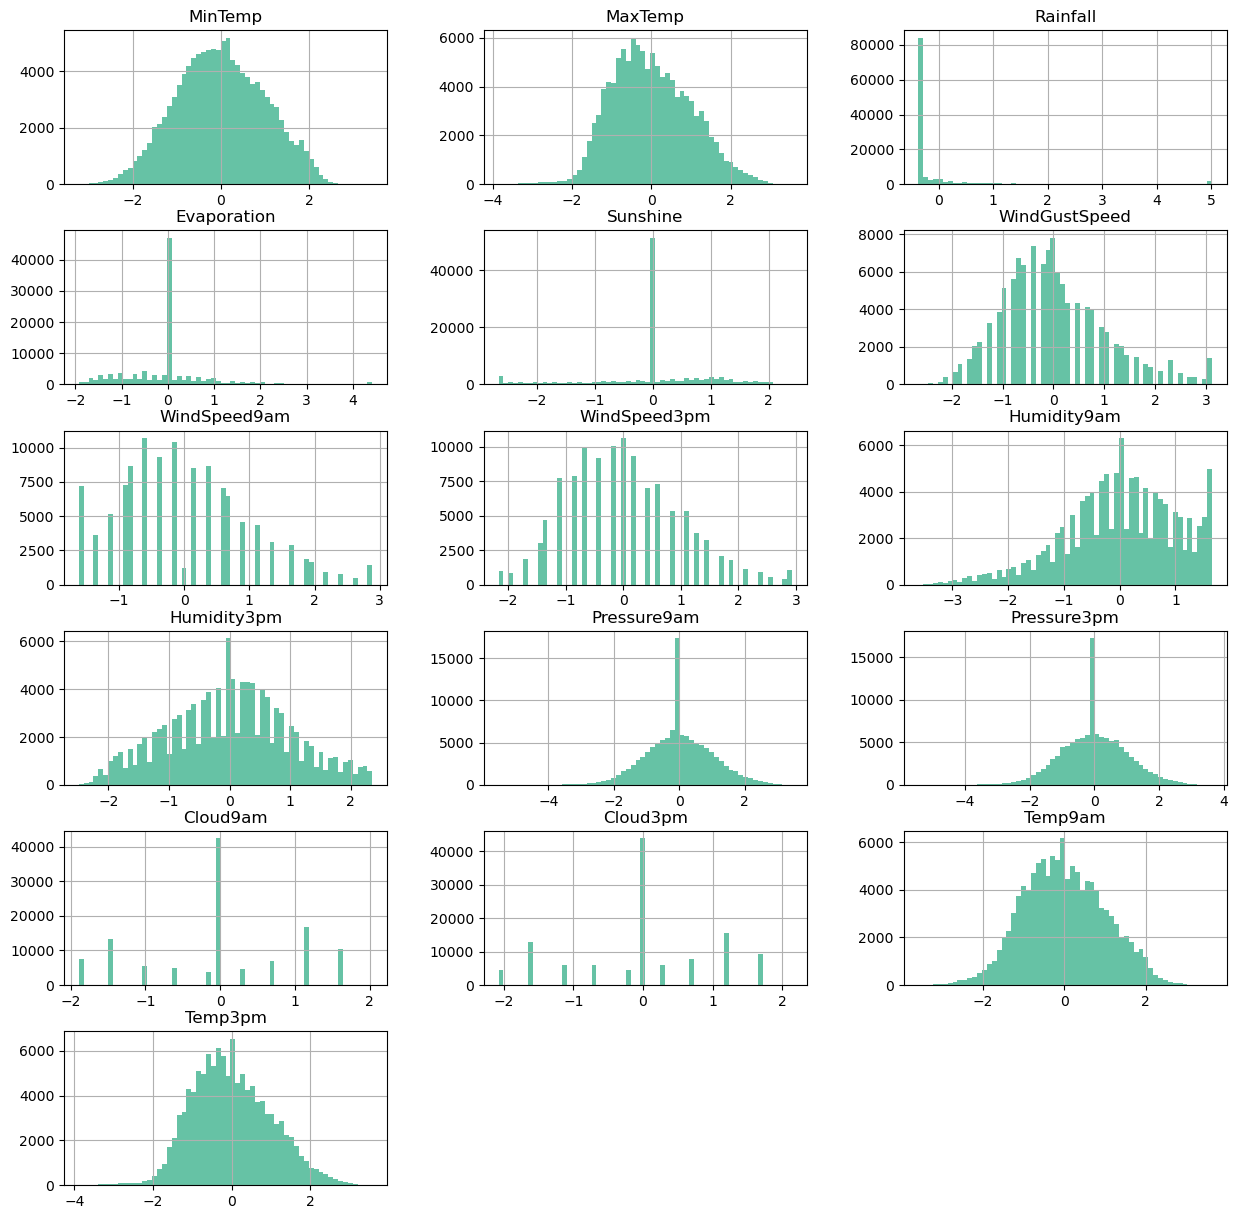

In [21]:
X_train_preproc.hist(column=numeric_cols, layout=(6, 3), sharex=False, bins=60, figsize=(15, 15))
plt.show()

In [22]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preproc, y_train)

# RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_preproc, y_train)

## Baseline Model

In [23]:
from sklearn.metrics import classification_report

def print_report(model):
    print(f"Train accuracy:\n{model.score(X_train_preproc, y_train)}\n")
    print(f"Test accuracy:\n{model.score(X_test_preproc, y_test)}\n")

    y_pred = model.predict(X_test_preproc)

    print(classification_report(y_test, y_pred))

In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=100,
    # C=1,
    # solver="lbfgs",
    # class_weight="balanced",
    # class_weight={0: 1, 1: 1.9},
    random_state=42,
    n_jobs=-1,
)

model.fit(X_train_preproc, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [85]:
print_report(model)

Train accuracy:
0.8505063715915642

Test accuracy:
0.8412258412258412

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     20028
           1       0.72      0.50      0.59      5946

    accuracy                           0.84     25974
   macro avg       0.79      0.72      0.75     25974
weighted avg       0.83      0.84      0.83     25974



In [55]:
coef_df = pd.DataFrame(
    {
        "feature_names": main_preprocessor.get_feature_names_out(),
        "coef": model.coef_[0]
    },
).sort_values(by="coef", ascending=False).reset_index(drop=True)
coef_df.head(10)

,feature_names,coef
0,RainToday_nan,1.609709
1,Humidity3pm,1.239783
2,Pressure9am,0.872020
3,WindGustSpeed,0.725958
4,WindDir3pm_NNW,0.558222
5,WindDir3pm_NW,0.523018
6,WindDir9am_NNE,0.500079
7,WindDir3pm_nan,0.462780
8,WindDir9am_N,0.403113
9,RainToday_Yes,0.402184


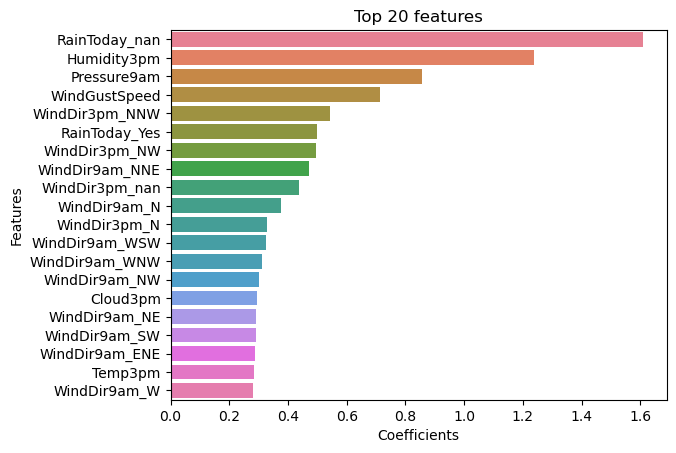

In [49]:
sns.barplot(
    data=coef_df.head(20),
    x="coef",
    y="feature_names",
    hue="feature_names"
)
plt.title("Top 20 features")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.show()

## Decision Tree Model

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gs_cv = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={
        "max_depth": [4],
        "max_leaf_nodes": [12],
        "min_samples_split": [2],
        "min_samples_leaf": [1]
    },
    scoring="f1",
    cv=5,
    n_jobs=-1
)

gs_cv.fit(X_train_preproc, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4], 'max_leaf_nodes': [12],
                         'min_samples_leaf': [1], 'min_samples_split': [2]},
             scoring='f1')

In [68]:
gs_cv.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [69]:
print_report(gs_cv.best_estimator_)

Train accuracy:
0.8335125926053399

Test accuracy:
0.8237083237083237

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     20028
           1       0.67      0.46      0.55      5946

    accuracy                           0.82     25974
   macro avg       0.76      0.70      0.72     25974
weighted avg       0.81      0.82      0.81     25974



In [197]:
gs_cv.best_estimator_.tree_.max_depth

4

## Random Forest Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    # max_leaf_nodes=800,
    class_weight={0: 1, 1: 2.2},
    # bootstrap=True,
    # max_samples=1.0,
    # max_features=0.8,
    # min_samples_leaf=1,
    # min_samples_split=2,
    random_state=42,
    n_jobs=-1,
)

model.fit(X_train_preproc, y_train)

print_report(model)

Train accuracy:
0.8494566292946937

Test accuracy:
0.8284438284438285

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     20028
           1       0.63      0.62      0.62      5946

    accuracy                           0.83     25974
   macro avg       0.76      0.76      0.76     25974
weighted avg       0.83      0.83      0.83     25974



In [71]:
max_depths = [tree.tree_.max_depth for tree in model.estimators_]
np.mean(max_depths)

10.0

In [72]:
coef_df = pd.DataFrame(
    {
        "feature_names": main_preprocessor.get_feature_names_out(),
        "coef": model.feature_importances_
    },
).sort_values(by="coef", ascending=False).reset_index(drop=True)
coef_df.head(10)

,feature_names,coef
0,Humidity3pm,0.254935
1,Rainfall,0.120325
2,Sunshine,0.084391
3,Humidity9am,0.069522
4,Cloud3pm,0.065225
5,RainToday_Yes,0.058048
6,Pressure3pm,0.057555
7,WindGustSpeed,0.052340
8,Pressure9am,0.034965
9,Temp3pm,0.033048


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

gs_cv = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions={
        "n_estimators": [100],
        "max_depth": [10, 12, 14],
        "class_weight": [{0: 1, 1: 2.2}],
        "max_leaf_nodes": [200, 400, 500, 600],
        # "min_samples_split": [2],
        # "min_samples_leaf": [1]
    },
    scoring="f1",
    n_iter=10,
    cv=5,
    n_jobs=8,
    random_state=42
)

gs_cv.fit(X_train_preproc, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=8,
                   param_distributions={'class_weight': [{0: 1, 1: 2.2}],
                                        'max_depth': [10, 12, 14],
                                        'max_leaf_nodes': [200, 400, 500, 600],
                                        'n_estimators': [100]},
                   random_state=42, scoring='f1')

In [74]:
gs_cv.best_params_

{'n_estimators': 100,
 'max_leaf_nodes': 200,
 'max_depth': 10,
 'class_weight': {0: 1, 1: 2.2}}

In [75]:
print_report(gs_cv.best_estimator_)

Train accuracy:
0.8398712775019576

Test accuracy:
0.8239393239393239

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     20028
           1       0.61      0.62      0.62      5946

    accuracy                           0.82     25974
   macro avg       0.75      0.75      0.75     25974
weighted avg       0.82      0.82      0.82     25974



In [76]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=14,
    max_leaf_nodes=400,
    class_weight={0: 1, 1: 2},
    # bootstrap=True,
    # max_samples=1.0,
    # max_features=0.8,
    # min_samples_leaf=1,
    # min_samples_split=2,
    random_state=42,
    n_jobs=-1,
)

model.fit(X_train_preproc, y_train)

print_report(model)

Train accuracy:
0.854068611844879

Test accuracy:
0.8315238315238315

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     20028
           1       0.64      0.61      0.62      5946

    accuracy                           0.83     25974
   macro avg       0.76      0.75      0.76     25974
weighted avg       0.83      0.83      0.83     25974



## ANN Classifier

In [112]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    hidden_layer_sizes=(64, 32), 
    activation="relu",
    solver="adam",
    max_iter=200,
    learning_rate="adaptive", # for SGD only
    learning_rate_init=0.0005,
    alpha=0.00001, # Regulazation L2
    early_stopping=True,
    # tol=1e-4, # Tolerance for the stopping criterion
    # n_iter_no_change=10, # Number of iterations with no improvement
    verbose=False,
    random_state=42
)
nn.fit(X_train_preproc, y_train)

print_report(nn)

Train accuracy:
0.8751150844526282

Test accuracy:
0.8518903518903519

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     20028
           1       0.71      0.60      0.65      5946

    accuracy                           0.85     25974
   macro avg       0.80      0.76      0.78     25974
weighted avg       0.85      0.85      0.85     25974



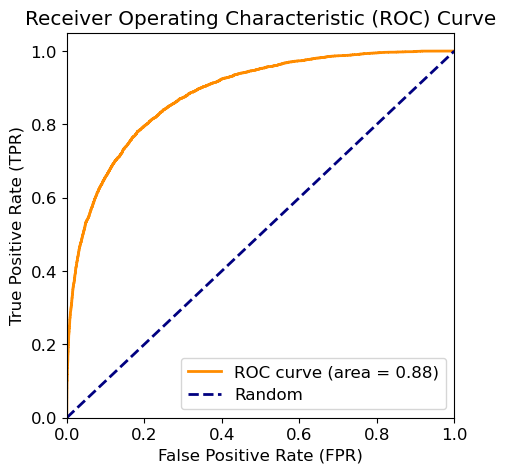

In [118]:
from sklearn.metrics import roc_curve, auc

y_pred_probs = nn.predict_proba(X_test_preproc)

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

In [24]:
from xgboost import XGBClassifier

?XGBClassifier

Init signature:
XGBClassifier(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbos

In [49]:
model = XGBClassifier(
    # n_estimators=20, 
    # max_depth=4,
    random_state=42,
    n_jobs=-1,
    device="cpu"
)

model.fit(X_train_preproc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
print_report(model)

Train accuracy:
0.8928918679389772

Test accuracy:
0.8492723492723493

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     20028
           1       0.72      0.57      0.63      5946

    accuracy                           0.85     25974
   macro avg       0.80      0.75      0.77     25974
weighted avg       0.84      0.85      0.84     25974



<Axes: >

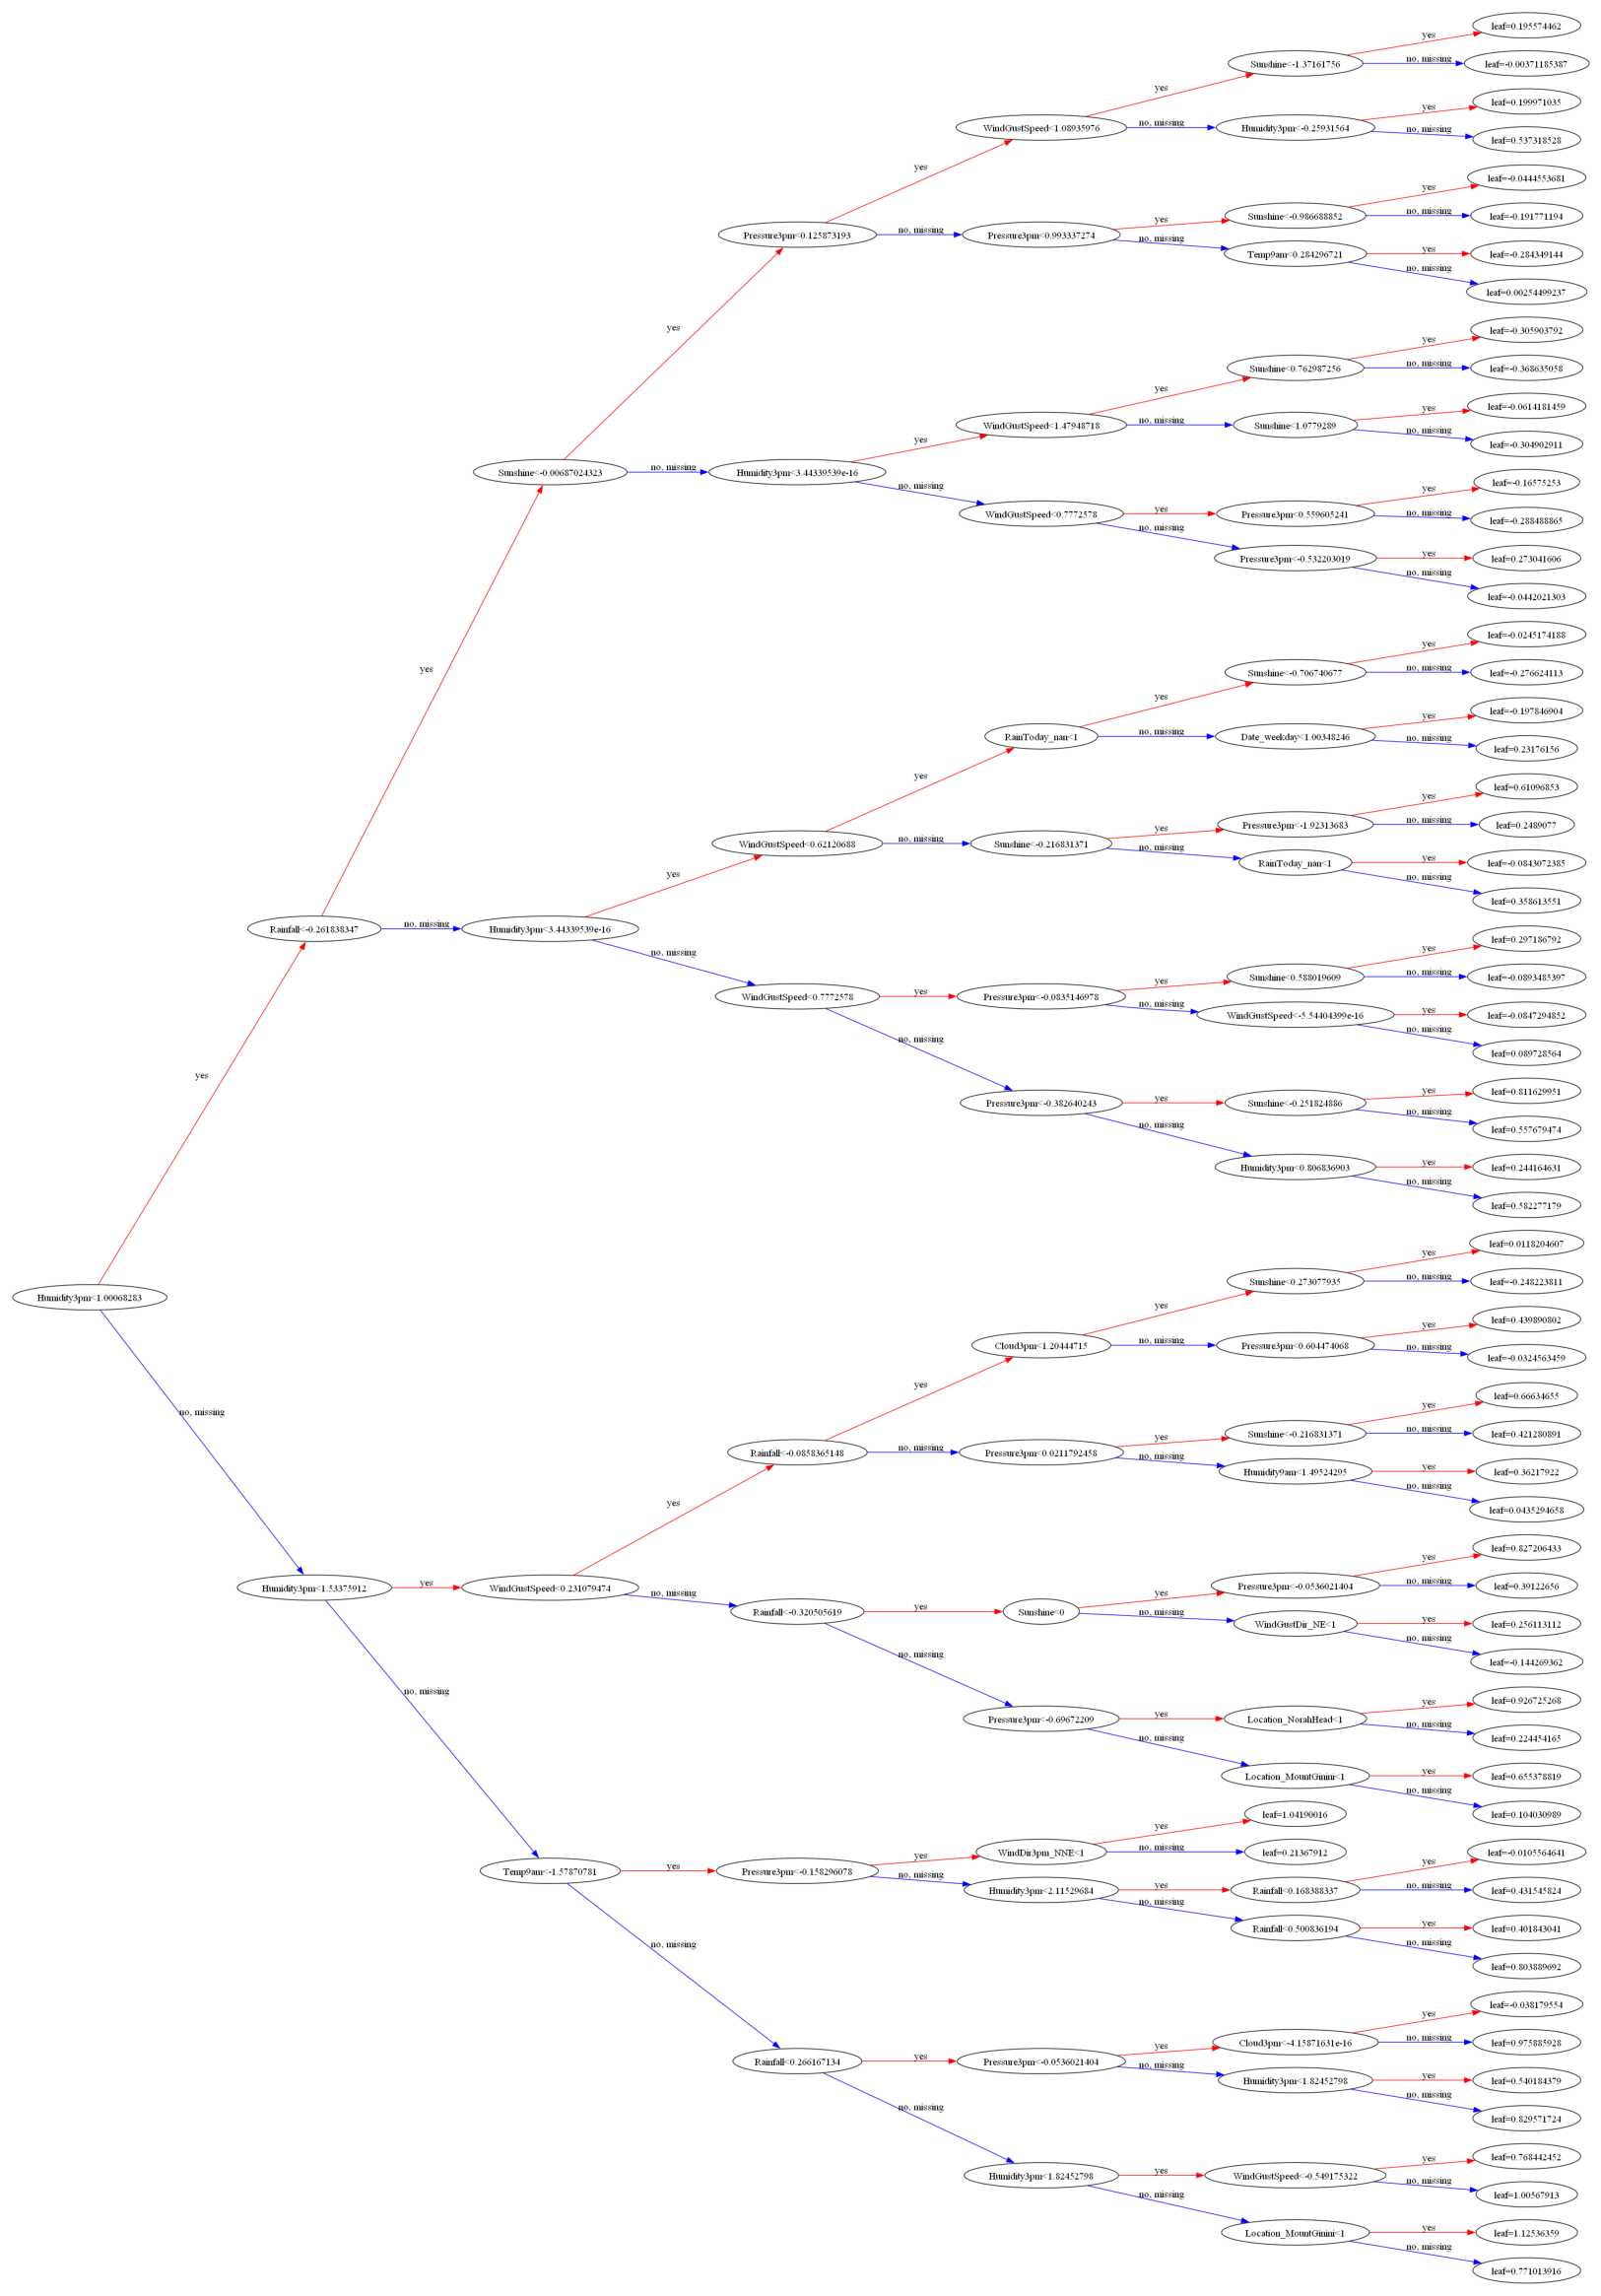

In [51]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 30, 30
plot_tree(model, rankdir='LR', num_trees=0)

In [52]:
trees = model.get_booster().get_dump()
len(trees)

100

In [53]:
print(trees[0])

0:[Humidity3pm<1.00068283] yes=1,no=2,missing=2
	1:[Rainfall<-0.261838347] yes=3,no=4,missing=4
		3:[Sunshine<-0.00687024323] yes=7,no=8,missing=8
			7:[Pressure3pm<0.125873193] yes=15,no=16,missing=16
				15:[WindGustSpeed<1.08935976] yes=31,no=32,missing=32
					31:[Sunshine<-1.37161756] yes=63,no=64,missing=64
						63:leaf=0.195574462
						64:leaf=-0.00371185387
					32:[Humidity3pm<-0.25931564] yes=65,no=66,missing=66
						65:leaf=0.199971035
						66:leaf=0.537318528
				16:[Pressure3pm<0.993337274] yes=33,no=34,missing=34
					33:[Sunshine<-0.986688852] yes=67,no=68,missing=68
						67:leaf=-0.0444553681
						68:leaf=-0.191771194
					34:[Temp9am<0.284296721] yes=69,no=70,missing=70
						69:leaf=-0.284349144
						70:leaf=0.00254499237
			8:[Humidity3pm<3.44339539e-16] yes=17,no=18,missing=18
				17:[WindGustSpeed<1.47948718] yes=35,no=36,missing=36
					35:[Sunshine<0.762987256] yes=71,no=72,missing=72
						71:leaf=-0.305903792
						72:leaf=-0.368635058
					36:[Sunshine<

In [59]:
feat_imp_df = pd.DataFrame(
    {
        "feature": X_train_preproc.columns, 
        "importance": model.feature_importances_
    }
).sort_values(by="importance", ascending=False).reset_index(drop=True)
feat_imp_df.head(10)

,feature,importance
0,Humidity3pm,0.099526
1,Rainfall,0.030753
2,Sunshine,0.023145
3,WindGustSpeed,0.022290
4,Cloud3pm,0.020880
5,Pressure3pm,0.018525
6,Location_Brisbane,0.017840
7,Location_Ballarat,0.017034
8,Location_Wollongong,0.016561
9,Location_Witchcliffe,0.015731


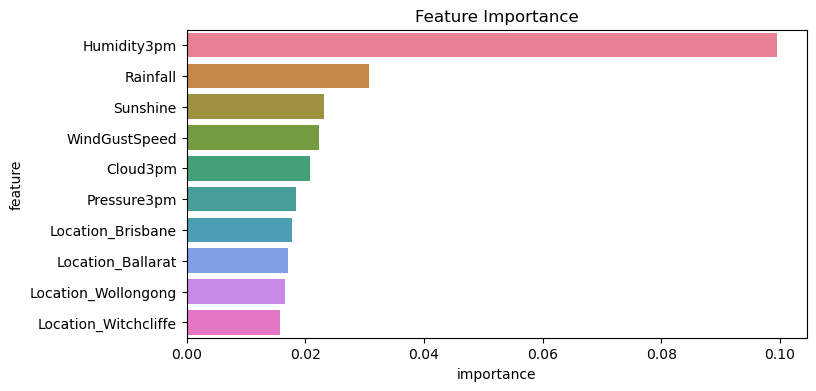

In [63]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.title("Feature Importance")
sns.barplot(data=feat_imp_df.head(10), x="importance", y="feature", hue="feature")
plt.show()

In [157]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gs_cv = GridSearchCV(
    estimator=XGBClassifier(
        random_state=42, n_jobs=-1
    ),
    param_grid={
        # "n_estimators": [100],
        # "max_depth": [6],
        # "learning_rate": [0.6],
        "colsample_bytree": [0.51],
        # "colsample_bynode": [1],
        # "colsample_bylevel": [1],
    },
    scoring="recall",
    n_jobs=-1
)

gs_cv.fit(X_train_preproc, y_train)
print_report(gs_cv.best_estimator_)
print(gs_cv.best_params_)

Train accuracy:
0.8889854498834098

Test accuracy:
0.8525833525833526

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     20028
           1       0.73      0.57      0.64      5946

    accuracy                           0.85     25974
   macro avg       0.80      0.75      0.77     25974
weighted avg       0.84      0.85      0.85     25974

{'colsample_bytree': 0.51}
